## Titanic Data Exploration

**By Agboola Quam.**

### Preliminary Wrangling

This document explores the titanic dataset containing various of the passengers that were on-board.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
titanic = pd.read_csv('titanic.csv')
titanic.sample(10)

PassengerId  Survived  Pclass                            Name     Sex  \
195          196         1       1            Lurette, Miss. Elise  female   
749          750         0       3         Connaghton, Mr. Michael    male   
136          137         1       1    Newsom, Miss. Helen Monypeny  female   
870          871         0       3               Balkic, Mr. Cerin    male   
367          368         1       3  Moussa, Mrs. (Mantoura Boulos)  female   
34            35         0       1         Meyer, Mr. Edgar Joseph    male   
791          792         0       2             Gaskell, Mr. Alfred    male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius    male   
509          510         1       3                  Lang, Mr. Fang    male   
729          730         0       3   Ilmakangas, Miss. Pieta Sofia  female   

      Age  SibSp  Parch            Ticket      Fare Cabin Embarked  
195  58.0      0      0          PC 17569  146.5208   B80        C  
749  31.0      0      0            335097    7.7500   NaN        Q  
136  19.0      0      2             11752   26.2833   D47        S  
870  26.0      0      0            349248    7.8958   NaN        S  
367   NaN      0      0              2626    7.2292   NaN        C  
34   28.0      1      0          PC 17604   82.1708   NaN        C  
791  16.0      0      0            239865   26.0000   NaN        S  
54   65.0      0      1            113509   61.9792   B30        C  
509  26.0      0      0              1601   56.4958   NaN        S  
729  25.0      1      0  STON/O2. 3101271    7.9250   NaN        S

In [3]:
#1 Checking the dimension of the titanic dataframe
titanic.shape

(891, 12)

**We have 891 rows and 12 columns in our data frame**

In [4]:
#2 Checking the data structure and also if there is missing value in any row in the data frame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#missing data
total = titanic.isnull().sum().sort_values(ascending=False)
percent = (titanic.isnull().sum()/titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000

Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is just a variable (Cabin) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which actually related to the survival of passengers (maybe that's the reason why data is missing?).

In what concerns the remaining cases, we can see that 'embarked' variable just have the two cases of missing data. Since it is just two observation, we'll delete these observations and keep the variable.

Regarding the remaining variables, we can see there were no missing cases.



**(1) We can see we have missing values in Age column**

**(2)We can also see we have missing in cabin and embarked column, although we wont be analyzing cabin**

**The first thing to do before dropping values is to drop specific rows with no values or fill in the missing value with the mean**


In [6]:
#droping the cabin, passengerid, name, ticket column from our dataset because it's not useful for analysis
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
#Changing all the column names to lowercase and underscore for consistency and easy data cleaning.
titanic.rename(columns={'Survived':'survived','Pclass':'pclass','Sex':'sex','Age':'age','SibSp':'sibsp','Parch':'parch','Fare':'fare','Embarked':'embarked'},inplace=True)

In [8]:
#Checking if the changes has been applied
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

### TITANIC DATA DESCRIPTION
**(1) passengerid = the passengers id**

**(2) survived = whether the passengers survived or not (0-not survived, 1-survived)**

**(3) pclass = passenger ticket class (1-high class, 2-middle class, 3-low class)**

**(4) name,sex,age = the name, gender =, and age of passengers**

**(5) ticket, fare, cabin, embarked = the ticket, the amount paid, cabin, and in embarks**

**(6) sibsp = the number of siblings and spouse each passengers have on board**

**(7) parch = the number of parents and children each passengers have on board**

### FILLING IN MISSING VALUES


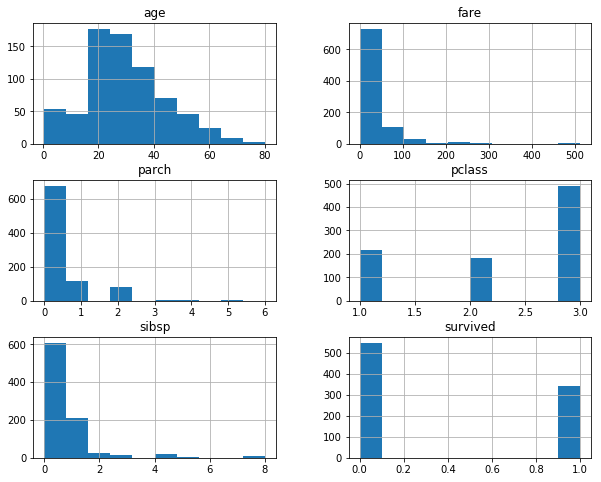

In [9]:
#checking histogram of entite titanic dataset
titanic.hist(figsize=(10,8));

**Age seems to be a lot that are missing, 714 instead of 891 entries.**

**We can just look at what the rows look like, because if they all have the same characteristics, it will be good to know**
**The null values can be from the same group**

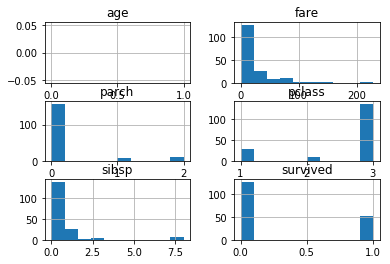

In [10]:
#we look at dataframe where the age is null using the histogram plot
titanic[titanic.age.isnull()].hist();

**We can see that age is off from the general plot above, so we will fill in the values with the mean**

In [11]:
#Fillin in the missing value and rechecking the dataset info
titanic.fillna(titanic.mean(),inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**The ages were all filled with the means**

**But the other variable (embarked) cannot be filled with the mean value because it is not a numeric data, it doesn't have a mean, just letters.**



In [12]:
#checking the rows that are missing in embarked column
titanic[titanic.embarked.isnull()]

survived  pclass     sex   age  sibsp  parch  fare embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

**But it looks like the embarked column only have 2 missing values, 889 entries instead of 891 entries**

**Since it is just a small amount of missing, we can just drop them.**



In [13]:
#dropping the rows in embarked that are missing and rechecking the data info
titanic.dropna(inplace=True);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
survived    889 non-null int64
pclass      889 non-null int64
sex         889 non-null object
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
fare        889 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


**Now we have a complete dataset with no missing value**


### What is the structure of your dataset?

There are 889 passengers in the titanic dataset with 8 features (survived, pclass, sex, age, sibsp, parch, fare, and embarked). Most variables are numeric in nature, but the variables cut, color, and clarity are binary factor variables with the following levels.

(1) survived = whether the passengers survived or not (0-not survived, 1-survived)

(2) pclass = passenger ticket class (1-low class, 2-middle class, 3-high class)

(3) sex = female , male

#### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the survival of passengers in the titanic dataset.

## EXPLORATION DATA ANALYSIS

### (1) Univariate exploration

**By looking at one variable at a time, we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables.**

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [14]:
#descriptive statistics summary of passengers age
titanic['age'].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

**Observations**
- We have 889 passengers inside the titanic ship
- The minimum age of passengers is like five months old (5months/12 months = 0.42 years)
- The maximum age of passengers is 80 years 
- The mean age of passengers is 27 years
- While the deviation is of 13 years

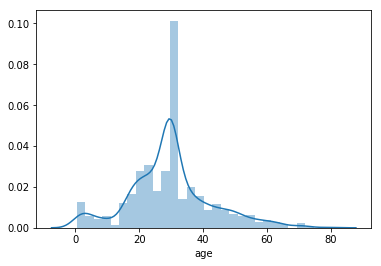

In [15]:
# univariate plot of passengers age
sb.distplot(titanic['age']);

In [16]:
#descriptive statistics summary of passengers ticket fare
titanic['fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

**Observations**
- We have 889 passengers inside the titanic ship
- The minimum fare passengers paid for ticket is 0 dollar
- The maximum fare passengers paid for ticket is 512.329 dollars 
- The mean fare passengers paid for ticket is 32.1 dollars
- While the deviation is of 49.7 dollars

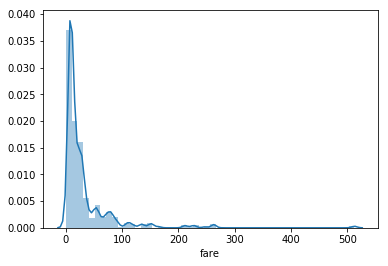

In [17]:
# univariate plot of passengers ticket fare
sb.distplot(titanic['fare']);

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


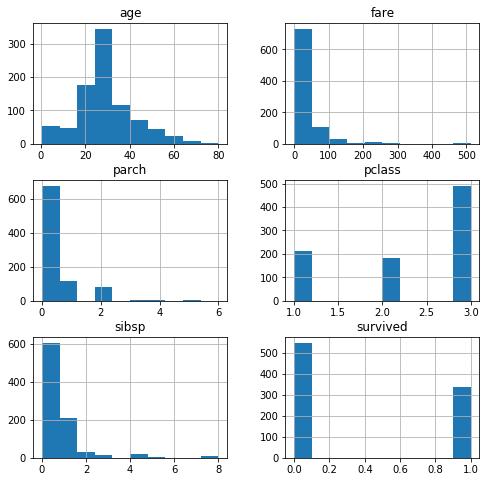

In [18]:
#Histogram plot for numeric variables in the titanic dataset
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
titanic.hist(ax=ax)
plt.show()

**Fare - the majority of the passenbers didn't pay too much, it's skewed to the right**

**Pclass - most people are in third class**

**Survived - most people didn't survive than survived**

**sibsp - most people didn't come with their siblings or spouses**

**parch - most people didn't come with parents or children**

**age - age is also skewed to the right with majorith being around 20 and 40**

#### BAR CHART OF QUALITATIVE VARIABLE IN THE DATASET

In [19]:
#Checking number of passengers that survived and didn't survive in the titanic dataset
pd.DataFrame(titanic.survived.value_counts())

survived
0       549
1       340

**we see that 549 didn't survive, while 340 survived**

In [20]:
#Checking counts of gender of the passengers
pd.DataFrame(titanic.sex.value_counts())

sex
male    577
female  312

**we see that most passengers are male with 577, while female with 312**

In [21]:
#Checking counts of class of the passengers
pd.DataFrame(titanic.pclass.value_counts())

pclass
3     491
1     214
2     184

**we see that most passengers are in low class with 491 passengers, 184 passengers are in middle slass, while 214 passengers are in first class**

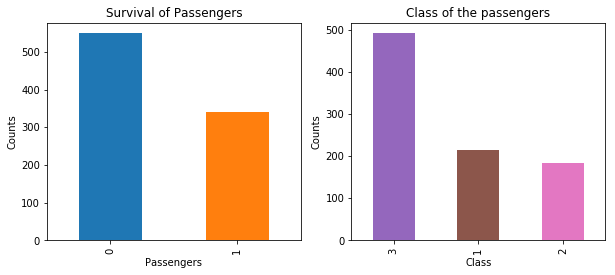

In [22]:
#Checking counts in our dataset with bar chart
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
titanic.survived.value_counts().plot(kind='bar',title='Survival of Passengers',color=['C0','C1']);
plt.xlabel('Passengers')
plt.ylabel('Counts');


plt.subplot(1,2,2);
titanic.pclass.value_counts().plot(kind='bar',title='Class of the passengers',color=['C4','C5','C6']);
plt.xlabel('Class')
plt.ylabel('Counts');


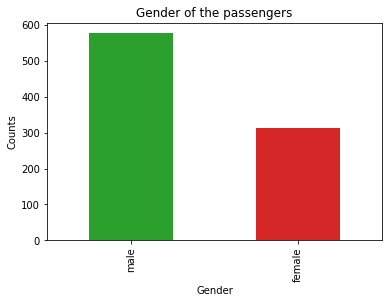

In [23]:
titanic.sex.value_counts().plot(kind='bar',title='Gender of the passengers',color=['C2','C3']);
plt.xlabel('Gender')
plt.ylabel('Counts');

## PIE CHART FOR QUALITATIVE VARIABLE

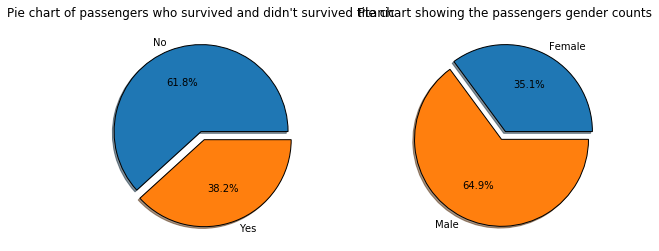

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
survive_values=[549,340]
survive_labels=["No","Yes"]
plt.axis("equal")
plt.title("Pie chart of passengers who survived and didn't survived titanic")
plt.pie(survive_values,labels=survive_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0.1],wedgeprops={'edgecolor':'black'});

plt.subplot(1,2,2);
gender_values=[312,577]
gender_labels=["Female","Male"]
plt.axis("equal")
plt.title("Pie chart showing the passengers gender counts")
plt.pie(gender_values,labels=gender_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0.1],wedgeprops={'edgecolor':'black'});

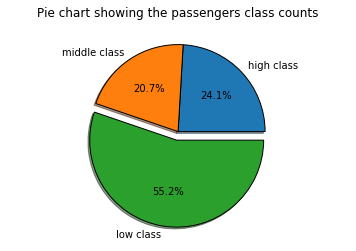

In [25]:
class_values=[214,184,491]
class_labels=["high class","middle class","low class"]
plt.axis("equal")
plt.title("Pie chart showing the passengers class counts")
plt.pie(class_values,labels=class_labels,radius=1.0,autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],wedgeprops={'edgecolor':'black'});

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the age, and embarked variables, we saw a problem (completeness issue)
The age and embarked column contained missing values which i had to deal with

And also i noticed a consistenscy issue while assessing visually with the variable names, so i had to change varible names to lower case for consistency.

### (2) Bivariate Exploration

**To start off with, I want to look at the pairwise correlations present between features in the data.**

**Through these bivariates plots, we can learn how changes in one variable might affect the variable in the second, and identify clusters and patterns in the dataset.**

In [26]:
numeric_vars = ['age', 'fare']
categoric_vars = ['survived', 'pclass', 'sex','sibsp','parch','embarked']

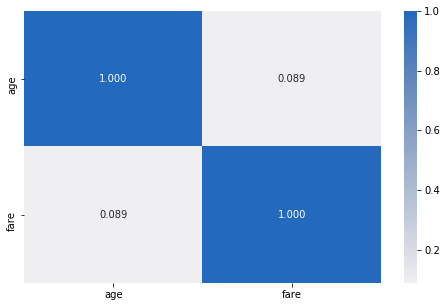

In [27]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(titanic[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### The relationship between survived and the predictor variables

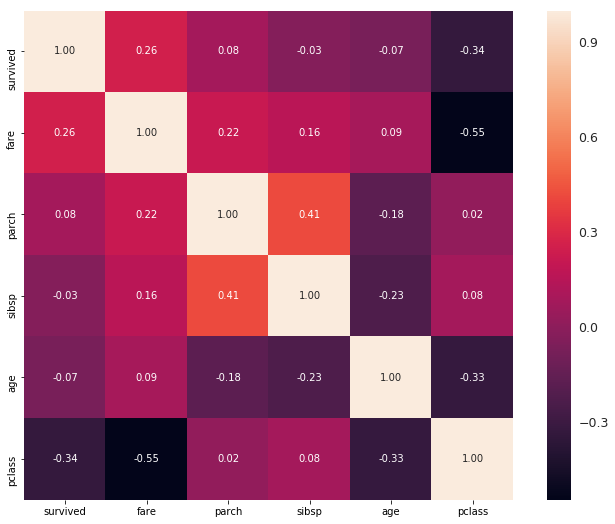

In [28]:
#survival correlation matrix
#correlation matrix
corrmat = titanic.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'survived')['survived'].index
cm = np.corrcoef(titanic[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

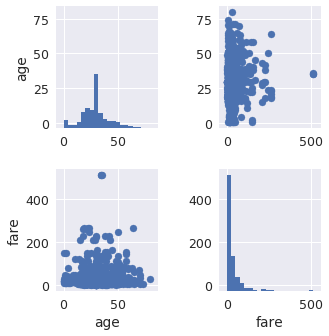

In [29]:
# plot matrix: checking relationship between the numerical variables in the dataset

g = sb.PairGrid(data = titanic, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As expected, the numeric variables (age and fare) dimensions are all highly correlated with one another

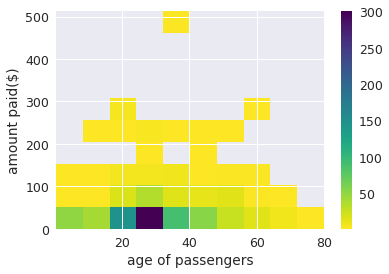

In [30]:
#using heat map
#Is there a relationships between the price of tickets in dollars and the age of the passengers
plt.hist2d(data=titanic,x='age',y='fare',cmin=0.5,cmap='viridis_r');
plt.colorbar()
plt.xlabel('age of passengers')
plt.ylabel('amount paid($)');

#### BOX PLOT AND VIOLIN PLOT SHOWING RELATIONSHIP BETWEEN QUANTITAIVE VARIABLE AND QUALITATIVE VARIABLE


**Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group. They allow comparing groups of different sizes.**

**The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.**


I used box plot to check the relationship between qualitative and quantitative variable in the titanic dataset, boxplot do a fine job of summarizing the titanic dataset, but there are some distributional details that can het lost which can be seen with the violin plot





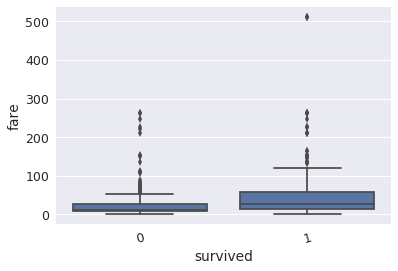

In [31]:
#Plotting a box plots for relationship between quantitative(fare) and qualitative variable(survived)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='survived',y='fare',color=base_color);
plt.xticks(rotation=15);

**We can see from the box plot that the passengers that didn't survive are more than those who did**

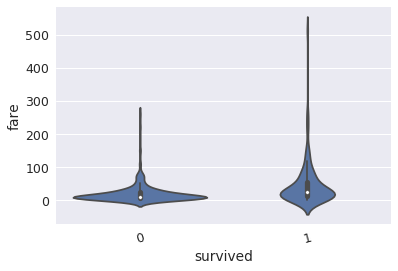

In [32]:
#Plotting a violin plots for relationship between quantitative(fare) and qualitative variable(survived)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='survived',y='fare',color=base_color);
plt.xticks(rotation=15);

**The violin plot gave us a detiled exlanation thet those who didn't survive paid lesser fare for the ticket while those that have higher chance of survival paid more**

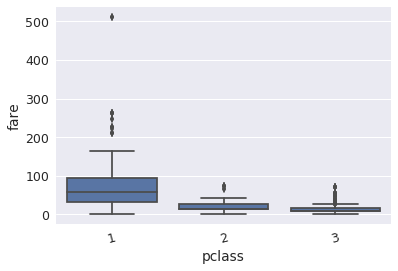

In [33]:
#Plotting a box plots for relationship between quantitative(fare) and qualitative variable(pclass)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='pclass',y='fare',color=base_color);
plt.xticks(rotation=15);

**We can see from the box plot that most passengers paid for low class while least passengers paid for high class**

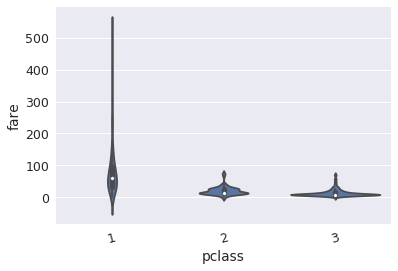

In [34]:
#Plotting a violin plots for relationship between quantitative(fare) and qualitative variable(fare)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='pclass',y='fare',color=base_color);
plt.xticks(rotation=15);

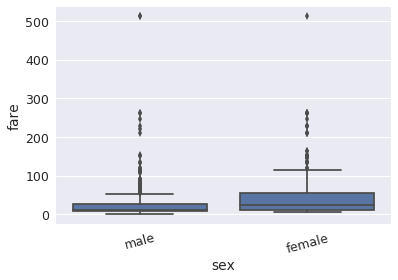

In [35]:
#Plotting a box plots for relationship between quantitative(fare) and qualitative variable(sex)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='sex',y='fare',color=base_color);
plt.xticks(rotation=15);

**We can see from the box plot that most passengers in the titanic that paid more fare are females**

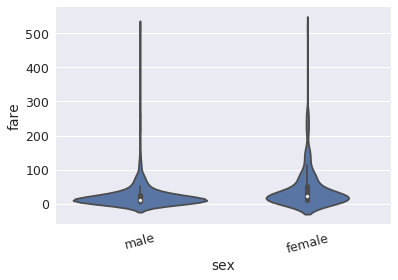

In [36]:
#Plotting a violin plots for relationship between quantitative(fare) and qualitative variable(sex)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='sex',y='fare',color=base_color);
plt.xticks(rotation=15);

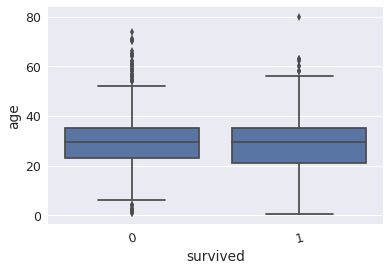

In [37]:
#Plotting a box plots for relationship between quantitative(age) and qualitative variable(survived)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='survived',y='age',color=base_color);
plt.xticks(rotation=15);

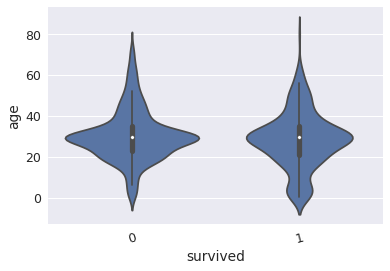

In [38]:
#Plotting a violin plots for relationship between quantitative(age) and qualitative variable(survived)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='survived',y='age',color=base_color);
plt.xticks(rotation=15);

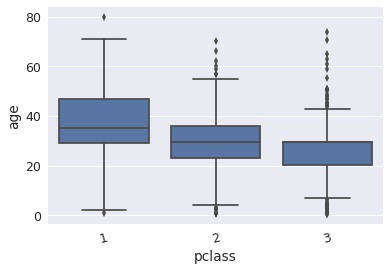

In [39]:
#Plotting a box plots for relationship between quantitative(age) and qualitative variable(pclass)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='pclass',y='age',color=base_color);
plt.xticks(rotation=15);

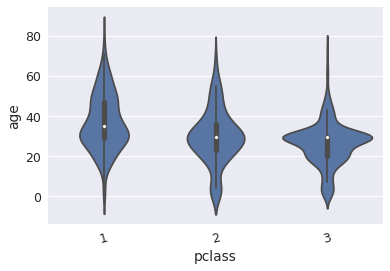

In [40]:
#Plotting a box plots for relationship between quantitative(age) and qualitative variable(pclass)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='pclass',y='age',color=base_color);
plt.xticks(rotation=15);

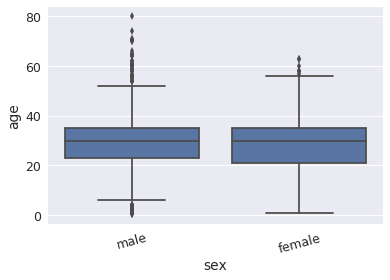

In [41]:
#Plotting a box plots for relationship between quantitative(fare) and qualitative variable(age)
base_color=sb.color_palette()[0]
sb.boxplot(data=titanic,x='sex',y='age',color=base_color);
plt.xticks(rotation=15);

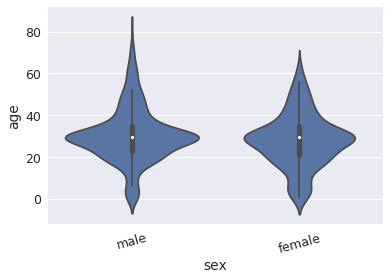

In [42]:
#Plotting a violin plots for relationship between quantitative(fare) and qualitative variable(age)
base_color=sb.color_palette()[0]
sb.violinplot(data=titanic,x='sex',y='age',color=base_color);
plt.xticks(rotation=15);

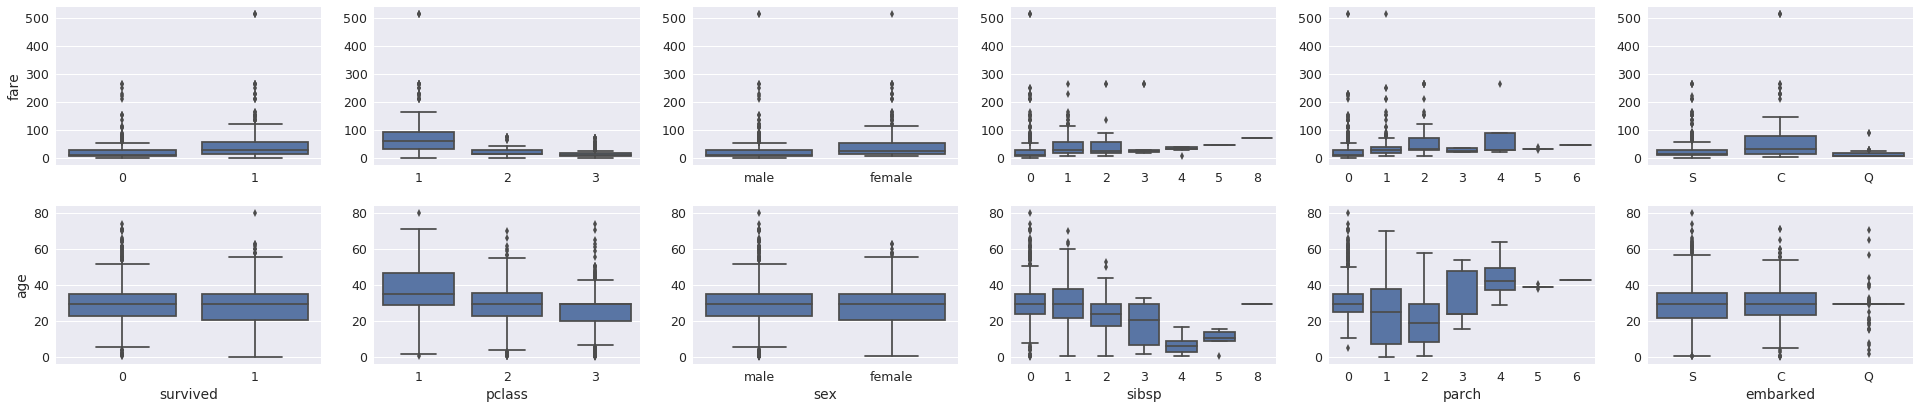

In [43]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [90, 90])
g = sb.PairGrid(data = titanic, y_vars = ['fare', 'age'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [44]:
survive=titanic.survived==True
died=titanic.survived==False

#### AGE VS SURVIVED

**Comparing the distribution of Age for the passengers who survived and didn't survive**

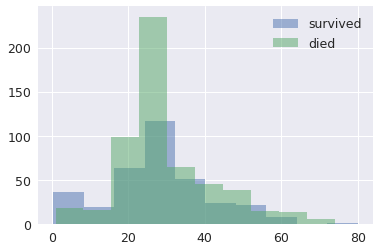

In [45]:
titanic.age[survive].hist(alpha=0.5,label='survived')
titanic.age[died].hist(alpha=0.5,label='died')
plt.legend();

**It does look like the really young children have a higher chance of surviving than other ages**

### CLUSTERED AND STACKED BAR CHART

**Showing relationships between two categorical varibales in the titanic dataset**

#### GENDER VS SURVIVED

**Comparing the distribution of passengers gender who survived and didn't survive**

In [46]:
#grouping two categorical variables together(sex and survived)
bygender=titanic.groupby("sex").survived.value_counts()
bygender

sex     survived
female  1           231
        0            81
male    0           468
        1           109
Name: survived, dtype: int64

**This result below, we have 340 out of 889 passengers that survived the titanic; which has a percentage of 38.25%,where females (26%) where more than male (12.261%) that survived**


**While 549 out of 889 patients did not survive the titanic; which has a percentage of 62%,where females (14.75%) where more than male (85,25%) that did not survived**

That is female are more likelt to survive than male .i.e. males passengers are likely to not survive the titanic than females passengers

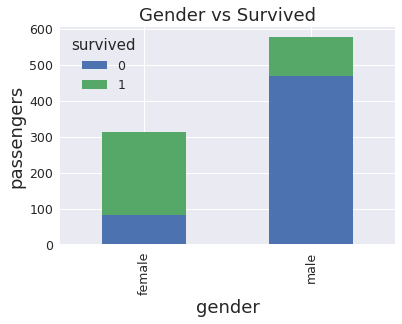

In [47]:
#plotting stacked bar chart of gender vs survived
bygender.unstack().plot(kind='bar',stacked=True);
plt.title('Gender vs Survived',fontsize=18)
plt.xlabel('gender',fontsize=18)
plt.ylabel('passengers',fontsize=18);

**This plot shows that females passengers are likely to survive the titanic than males passengers (.i.e. males are less likely to not survive). It does look like there are definitely more females surviving than male**

In [48]:
#plotting clustered bar chart of gender vs survived
bygender=bygender.reset_index(name='count')
bygender.pivot(index='sex',columns='survived',values='count')


survived    0    1
sex               
female     81  231
male      468  109

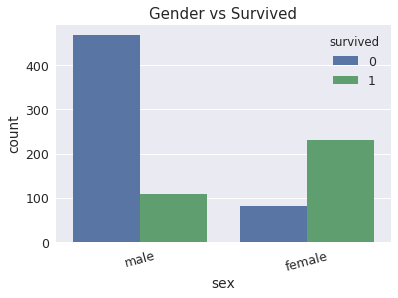

In [49]:
sb.countplot(data=titanic,x='sex',hue='survived')
plt.xticks(rotation=15)
plt.title('Gender vs Survived');

**This plot shows that females passengers are likely to survive the titanic than males passengers (.i.e. males are less likely to not survive). It does look like there are definitely more females surviving than male**

#### GENDER VS PCLASS

**Comparing the distribution of passengers gender and the class of the tickets they paid for**

In [50]:
#grouping two categorical variables together(sex and pclass)
byc=titanic.groupby("sex").pclass.value_counts()
byc

sex     pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: pclass, dtype: int64

**Note, male passengers (64.9%) are more than female passengers(35.1%) in the titanic dataset**

- This result below, we have 214 out of 889 passengers that are in first class; which has a percentage of 24.1%,where females (10.35%) where more than male (13.723%) that were in first class.

- We have 184 out of 889 passengers that are in second class; which has a percentage of 20.7%,where females (8.55%) where more than male (12.15%) that were in second class class.

- We have 491 out of 889 passengers that are in third class; which has a percentage of 55.23%,where females (16.2%) where more than male (39.03%) that were in third class.

**In general, we have more passengers in low class (55.2%) than the middle class(20.7%) and high class(24.1%).**

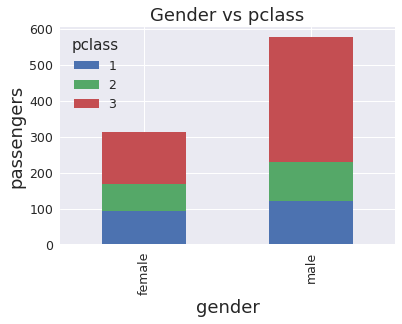

In [51]:
#plotting stacked bar chart of gender vs pclass
byc.unstack().plot(kind='bar',stacked=True);
plt.title('Gender vs pclass',fontsize=18)
plt.xlabel('gender',fontsize=18)
plt.ylabel('passengers',fontsize=18);

From the plot, it does look like female are in more expensive, or are spending more, probably more in first class

In [52]:
#plotting clustered bar chart of gender vs pclass
byc=byc.reset_index(name='count')
byc.pivot(index='sex',columns='pclass',values='count')

pclass    1    2    3
sex                  
female   92   76  144
male    122  108  347

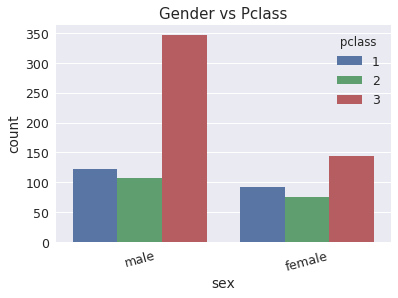

In [53]:
sb.countplot(data=titanic,x='sex',hue='pclass')
plt.xticks(rotation=15)
plt.title('Gender vs Pclass');

#### SURVIVED VS PCLASS

**Comparing the distribution of passengers who survived and didn't survive and the class of the tickets they paid for**

In [54]:
#grouping two categorical variables together(survived and pclass)
bys=titanic.groupby("survived").pclass.value_counts()
bys

survived  pclass
0         3         372
          2          97
          1          80
1         1         134
          3         119
          2          87
Name: pclass, dtype: int64

- in the result above, we have 134 out of 889 passengers that are in first class that survived the titanic; which has a percentage of 15.1% while 80 out of 889 passengers that are in first class didn't survive the titanic; with the percentage of 8.999%.

- We have 87 out of 889 passengers that are in second class that survived the titanic; which has a percentage of 9.79% while 97 out of 889 passengers that are in second class didn't survive the titanic; with the percentage of 10.911%.

- We have 119 out of 889 passengers that are in third class that survived the titanic; which has a percentage of 13.386% while 372 out of 889 passengers that are in third class didn't survive the titanic; with the percentage of 41.85%.

**In general, passengers in high class are more likely to survive than passengers in middle class and low class, because the probability of surviving is more than not surviving.**

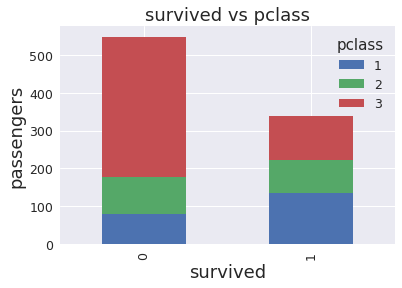

In [55]:
#plotting stacked bar chart of survived vs pclass
bys.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs pclass',fontsize=18)
plt.xlabel('survived',fontsize=18)
plt.ylabel('passengers',fontsize=18);

In [56]:
#plotting clustered bar chart of survived vs pclass
bys=bys.reset_index(name='count')
bys.pivot(index='survived',columns='pclass',values='count')

pclass      1   2    3
survived              
0          80  97  372
1         134  87  119

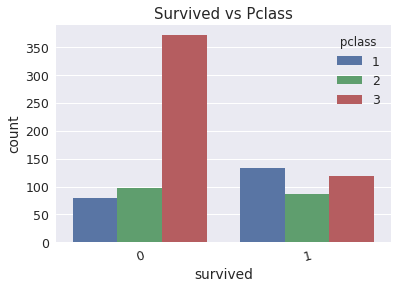

In [57]:
sb.countplot(data=titanic,x='survived',hue='pclass')
plt.xticks(rotation=15)
plt.title('Survived vs Pclass');

### sibsp vs survived

**Comparing the distribution of having family (siblings and spouse) on board is associated with survival**

In [58]:
#grouping two variables together(survived and sibsp)
bysib=titanic.groupby("sibsp").survived.value_counts()


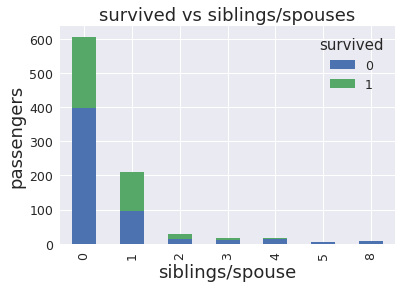

In [59]:
#plotting stacked bar chart of survived vs siblings/spouses
bysib.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs siblings/spouses',fontsize=18)
plt.xlabel('siblings/spouse',fontsize=18)
plt.ylabel('passengers',fontsize=18);

**From our result;**
- A lot of people who have lots of families didn't appear to be surviving
- Passengers who have one(1) survived more by a little bit
- And majority of passengers who are alone (i.e. 0(zer0)) didn't appear to be surviving, probably most of the passengers are in this category (0-alone)

### parch vs survived

**Comparing the distribution of having family (parents and children) on board is associated with survival**

In [60]:
#grouping two variables together(survived and parch)
bypar=titanic.groupby("parch").survived.value_counts()


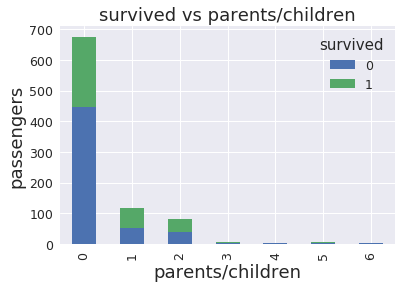

In [61]:
#plotting stacked bar chart of survived vs parent/children
bypar.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs parents/children',fontsize=18)
plt.xlabel('parents/children',fontsize=18)
plt.ylabel('passengers',fontsize=18);

**From our result;**
- A lot of people who have lots of families didn't appear to be surviving
- Passengers who have one(1) survived more by a little bit
- And majority of passengers who are alone (i.e. 0(zer0)) didn't appear to be surviving, probably most of the passengers are in this category (0-alone)

**In general, passengers with big families didn't appear to be survive as well as those who are alone**

### EMBARKED VS SURVIVED

**Where the passengers were currently when they add impact with the iceberg and their chances of survival**

In [62]:
#grouping two variables together(survived and embarked)
byemb=titanic.groupby("embarked").survived.value_counts()
byemb


embarked  survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: survived, dtype: int64

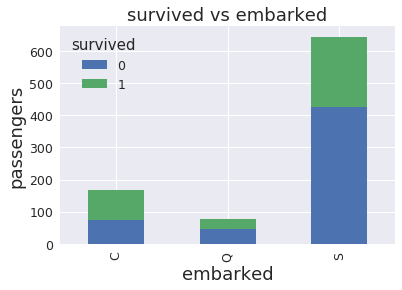

In [63]:
#plotting stacked bar chart of survived vs embarked
byemb.unstack().plot(kind='bar',stacked=True);
plt.title('survived vs embarked',fontsize=18)
plt.xlabel('embarked',fontsize=18)
plt.ylabel('passengers',fontsize=18);

- We can see from our plot that the passengers in the S category seemed to be not having as much luck
- Passengers in C category seemed a little bit better
- And passengers in category Q is not that great too

**In general, embarked seem to have some association with the chance of survival**

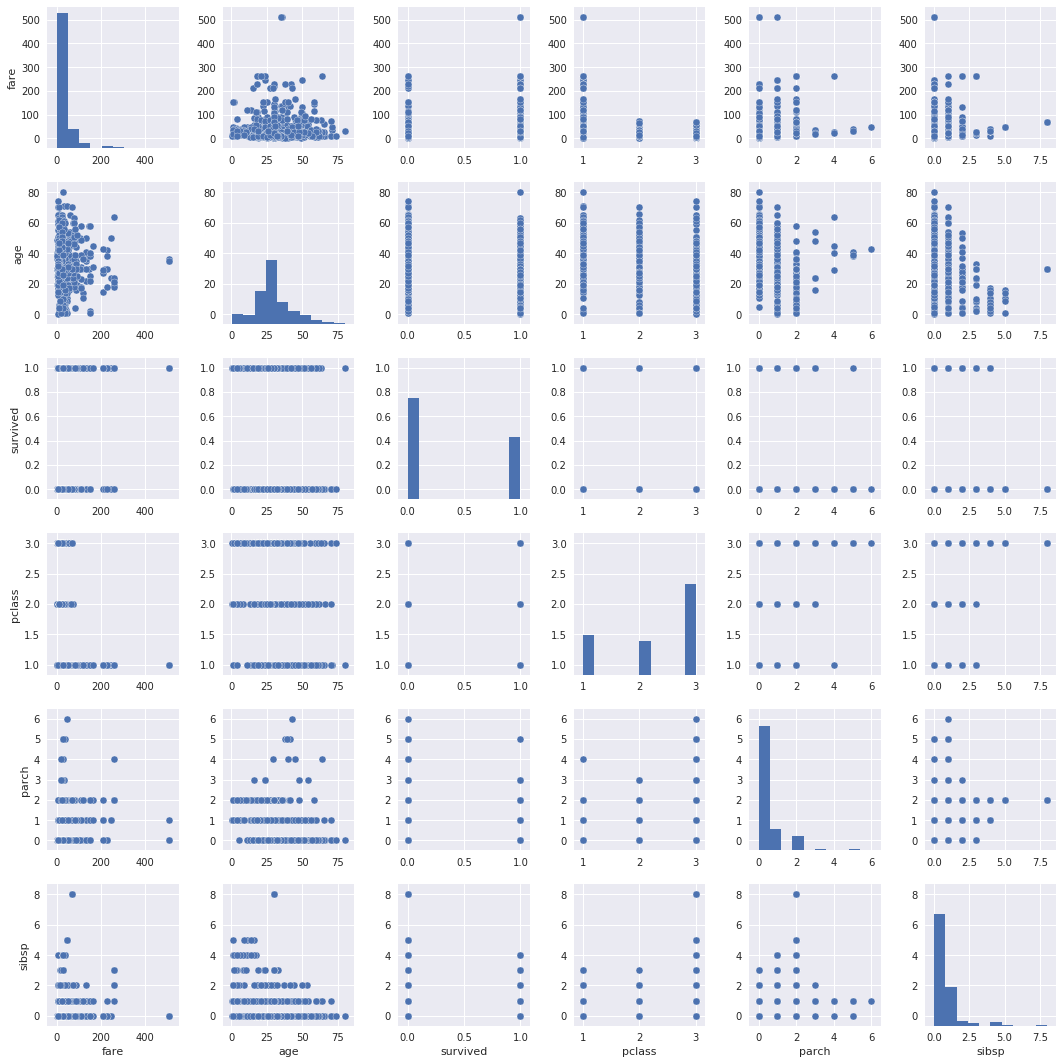

In [64]:
#scatterplot
sb.set()
cols = ['fare', 'age', 'survived', 'pclass', 'parch', 'sibsp']
sb.pairplot(titanic[cols], size = 2.5)
plt.show();

### (3) MULTIVARIATE EXPLORATION

Visualizing three or more vriables

#### pclass vs age vs fare vs survived

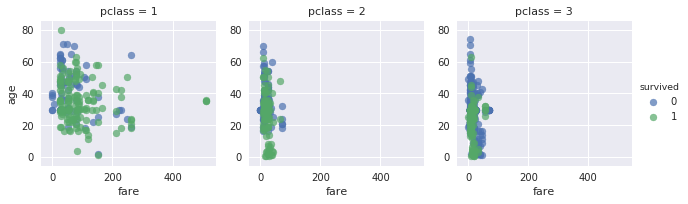

In [65]:
g = sb.FacetGrid(titanic, col="pclass", hue="survived")
g.map(plt.scatter, "fare", "age", alpha=.7)
g.add_legend();

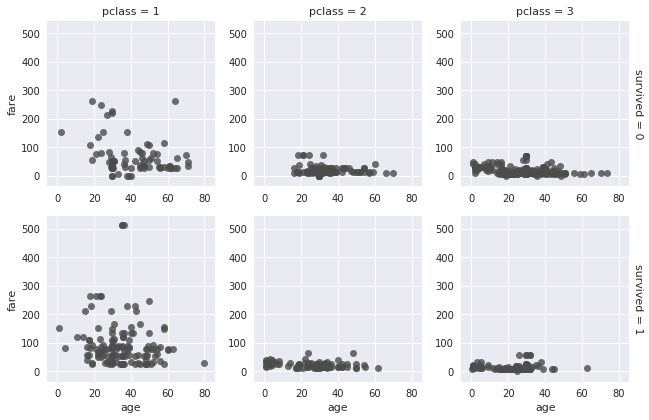

In [66]:
g = sb.FacetGrid(titanic, row="survived", col="pclass", margin_titles=True)
g.map(sb.regplot, "age", "fare", color=".3", fit_reg=False, x_jitter=.1);

#### parch vs age vs fare vs survived

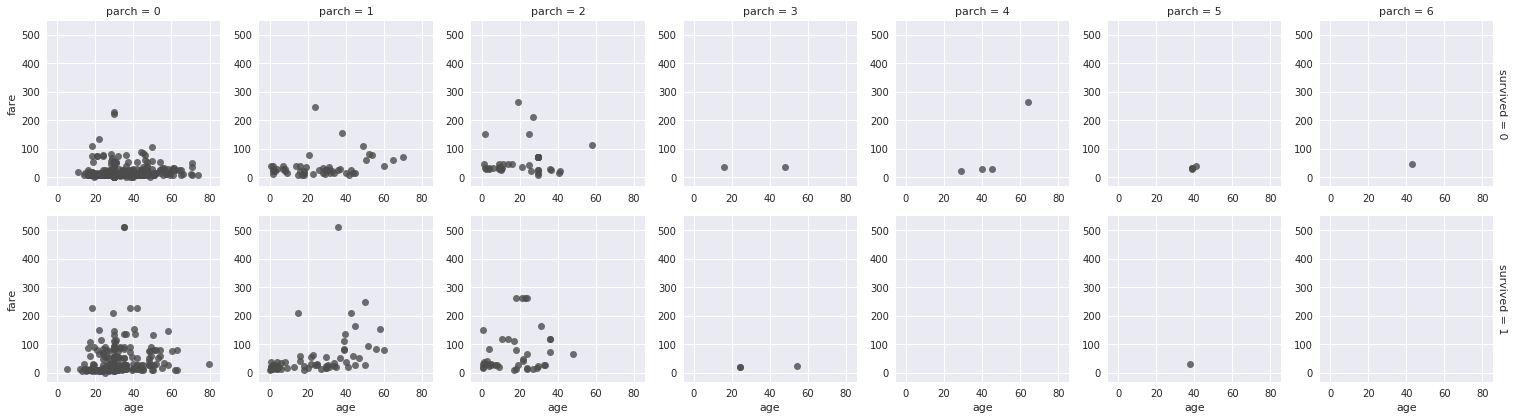

In [67]:
g = sb.FacetGrid(titanic, row="survived", col="parch", margin_titles=True)
g.map(sb.regplot, "age", "fare", color=".3", fit_reg=False, x_jitter=.1);

#### sibsp vs age vs fare vs survived

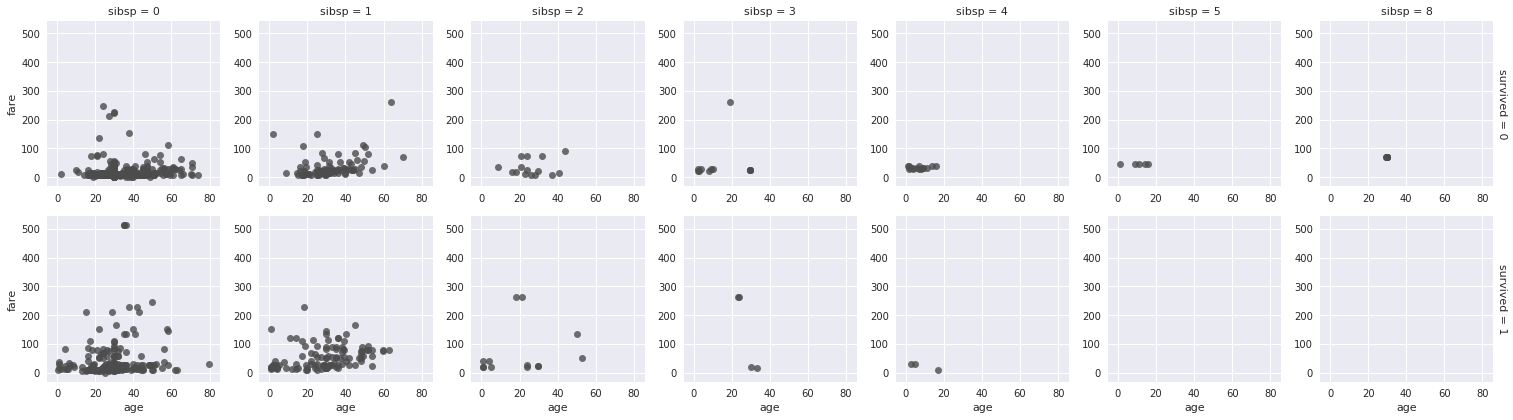

In [68]:
g = sb.FacetGrid(titanic, row="survived", col="sibsp", margin_titles=True)
g.map(sb.regplot, "age", "fare", color=".3", fit_reg=False, x_jitter=.1);

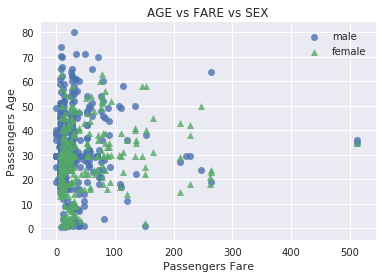

In [69]:
ttype_markers=[['male','o'],['female','^']]
for ttype, marker in ttype_markers:
    plot_data=titanic.loc[titanic['sex']==ttype]
    sb.regplot(data=plot_data,x='fare',y='age',x_jitter=0.04,marker=marker,fit_reg=False);
    plt.xlabel('Passengers Fare')
    plt.ylabel('Passengers Age')
    plt.title('AGE vs FARE vs SEX')
    plt.legend(['male','female']);
    

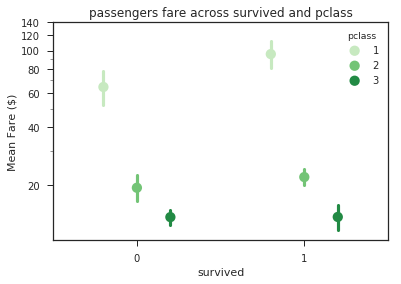

In [82]:
sb.pointplot(data = titanic, x = 'survived', y = 'fare', hue = 'pclass',
             palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('passengers fare across survived and pclass')
plt.ylabel('Mean Fare ($)')
plt.yscale('log')
plt.yticks([20, 40, 60, 80, 100, 120, 140],[20, '40', '60', '80', '100', '120', '140'])


plt.show();

In [73]:
#Log transforming the x-variable(price) because the price variable was skewed
#so we log transform price variable to reduce skewness
fare_log = np.log10(titanic['fare'])
age_log = np.log10(titanic['age'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


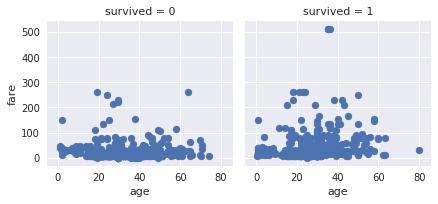

In [74]:
# multivariate plot of price by carat weight, and clarity
#Using faceted scatterplot
g=sb.FacetGrid(data=titanic,col='survived',margin_titles=True,col_wrap=3)
g.map(plt.scatter,'age','fare');

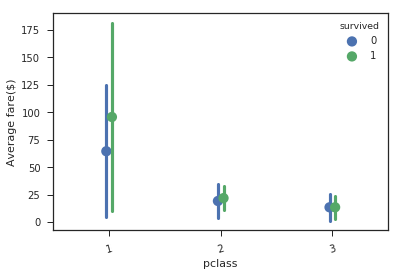

In [84]:
# multivariate plot of fare by pclass and survived
#Fare by survived and pclass using box plot

sb.pointplot(data=titanic,x='pclass',y='fare',hue='survived',ci='sd',linestyles=" ",dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Average fare($)');

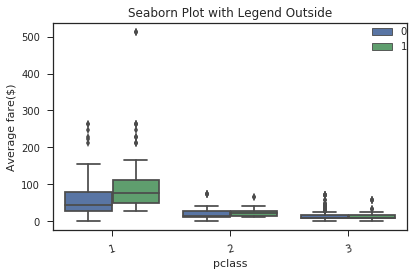

In [83]:
# multivariate plot of fare by pclass and survived
#Fare by survived and pclass using box plot


sb.boxplot(x='pclass',y='fare',hue='survived',data=titanic);
sb.set(style="ticks")
plt.xticks(rotation=15)
plt.ylabel('Average fare($)');
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Seaborn Plot with Legend Outside")
plt.tight_layout()
plt.savefig("place_legend_outside_plot_Seaborn_boxplot.png",
                    format='png',dpi=150)

It can be seen that there is a relationship between fare, pclass and survival

It can be seen through the box plot that people in high class are more likely to survive than middle and low class

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of fare against pclass and survival in this section by looking at the impact of fare and pclass against the chance of survival. The multivariate exploration here showed that there indeed is a positive effect of increased survival rate on the fare passengers paid for ticket.

I also look at fare against age and survival in this section by looking at the impact of fare and age against the chance of survival. The multivariate exploration here showed that the young passengers have higher chance of surviving than the old people. 